# DS 105 Project

Create a **Recommender System** based on customer demographic:
1. skin tone
2. skin type
3. hair colour
4. eye colour

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Get the Data
retrieve relevant columns and merging all 6 review datasets

In [2]:
# import all products info
product_info = pd.read_csv("product_info.csv")
product_info

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,P467659,Couture Clutch Eyeshadow Palette,1070,Yves Saint Laurent,2790,4.4286,7.0,NaN,NaN,NaN,...,0,0,0,NaN,Makeup,Eye,Eye Palettes,0,NaN,NaN
8490,P500874,L'Homme Eau de Parfum,1070,Yves Saint Laurent,2319,4.6367,556.0,2 oz / 60 mL,Size + Concentration + Formulation,2 oz / 60 mL eau de parfum spray,...,0,0,0,"['Layerable Scent', 'Woody & Earthy Scent']",Fragrance,Men,Cologne,1,129.0,129.0
8491,P504428,Mon Paris Eau de Parfum Gift Set,1070,Yves Saint Laurent,1475,5.0000,2.0,NaN,NaN,NaN,...,1,1,0,NaN,Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
8492,P504448,Y Eau de Parfum Gift Set,1070,Yves Saint Laurent,840,NaN,NaN,NaN,NaN,NaN,...,1,0,0,NaN,Fragrance,Value & Gift Sets,Cologne Gift Sets,0,NaN,NaN


In [3]:
# import all reviews
reviews_1 = pd.read_csv("reviews_0_250.csv")
reviews_2 = pd.read_csv("reviews_250_500.csv")
reviews_3 = pd.read_csv("reviews_500_750.csv")
reviews_4 = pd.read_csv("reviews_750_1000.csv")
reviews_5 = pd.read_csv("reviews_1000_1500.csv")
reviews_6 = pd.read_csv("reviews_1500_end.csv")

C:\Users\Ivy\AppData\Local\Temp\ipykernel_19216\269865487.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_1 = pd.read_csv("reviews_0_250.csv")
C:\Users\Ivy\AppData\Local\Temp\ipykernel_19216\269865487.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_5 = pd.read_csv("reviews_1000_1500.csv")
C:\Users\Ivy\AppData\Local\Temp\ipykernel_19216\269865487.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_6 = pd.read_csv("reviews_1500_end.csv")


In [4]:
# concat all imported reviews
reviews = pd.concat([reviews_1, reviews_2, reviews_3, reviews_4, reviews_5, reviews_6], axis=0)
reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [5]:
# shape of merged reviews
reviews.shape

(1301136, 19)

# Remove irrelevant columns and sort time

In [6]:
columns_to_remove = ['Unnamed: 0','rating','is_recommended','helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'review_text', 'review_title', 'brand_name', 'price_usd']
reviews.drop(columns=columns_to_remove, inplace=True) #remove
reviews.sort_values('submission_time', inplace=True) #sort

reviews.head()

,author_id,submission_time,skin_tone,eye_color,skin_type,hair_color,product_id,product_name
24874,1386893505,2008-08-28,light,NaN,combination,NaN,P7880,Soy Hydrating Gentle Face Cleanser
484785,927434292,2008-08-28,light,NaN,combination,NaN,P449599,Mini Anti-Aging Cleansing Gel
483182,927434292,2008-08-28,light,NaN,combination,NaN,P39274,Anti-Aging Cleansing Gel
133040,411867282,2008-08-29,fair,NaN,oily,NaN,P4010,AHA/BHA Exfoliating Cleanser
104853,411867282,2008-08-29,fair,NaN,oily,NaN,P122767,All About Lips


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data

## Missing Data

In [7]:
# retrieve missing rows
nan_rows = reviews.iloc[:, 2:6][reviews.iloc[:, 2:6].isnull().any(axis=1)]
nan_rows.head()

,skin_tone,eye_color,skin_type,hair_color
24874,light,NaN,combination,NaN
484785,light,NaN,combination,NaN
483182,light,NaN,combination,NaN
133040,fair,NaN,oily,NaN
104853,fair,NaN,oily,NaN


In [8]:
nan_rows.shape

(290308, 4)

# Customers and Products Information

In [9]:
#unique customers
print(f"There are {reviews['author_id'].nunique()} unique customers.")

There are 578653 unique customers.


In [11]:
# unique products
print(f"There are {reviews['product_id'].nunique()} unique products.")

There are 2351 unique products.


In [12]:
# how many items each cusotmer buy
items_per_customer = reviews.groupby('author_id')['product_id'].nunique()
items_per_customer

author_id
538863             1
549704             1
557770             1
561736             2
562130             2
                  ..
orderGen51156      7
orderGen53499      1
orderGen5563740    4
orderGen703225     1
orderGen899861     1
Name: product_id, Length: 578653, dtype: int64

In [13]:
# Product_id bought count

# Group by product_id and aggregate author_id into a list
grouped_data = reviews.groupby('product_id')['author_id'].apply(list)

# Calculate count of unique author_id values for each product_id
counts = grouped_data.apply(lambda x: len(set(x)))

# Create a DataFrame to store the counts
counts_df = pd.DataFrame({'product_id': counts.index, 'Count': counts.values})

# Sort the DataFrame by count in descending order
sorted_counts_df = counts_df.sort_values(by='Count', ascending=False)

# Display the counts in a table
sorted_counts_df

,product_id,Count
387,P420652,15853
2344,P7880,8544
42,P218700,7461
54,P248407,7385
60,P269122,7378
...,...,...
2098,P501886,1
1703,P478260,1
2299,P504882,1
1993,P500155,1


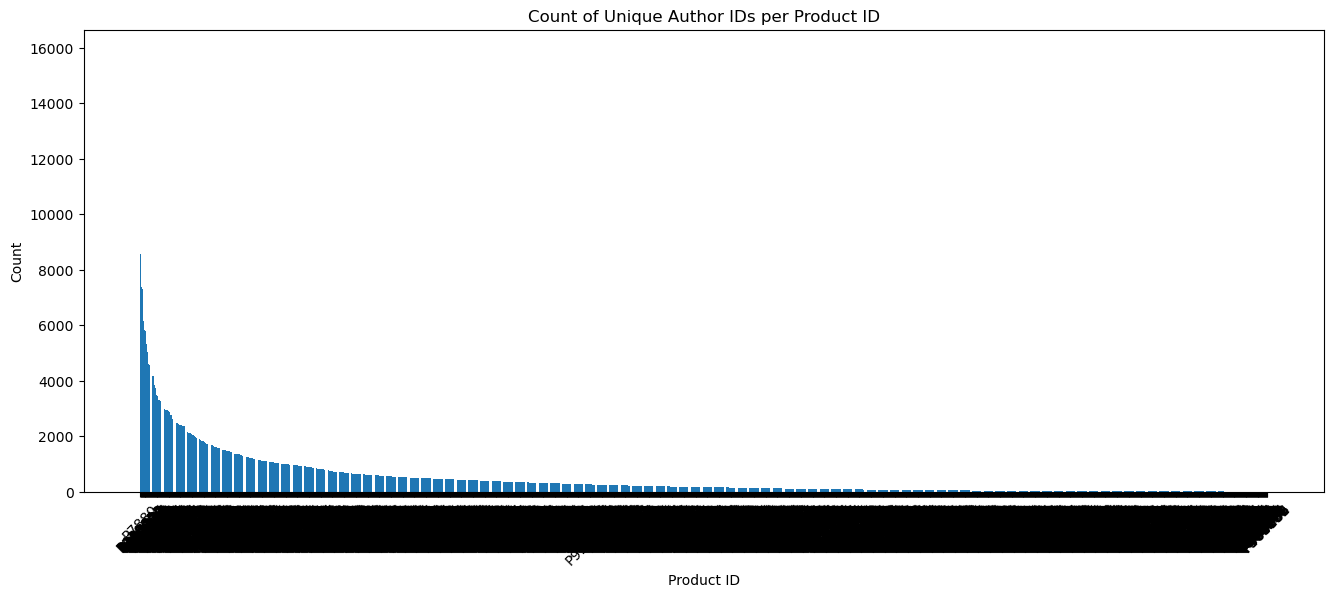

In [14]:
import matplotlib.pyplot as plt

# Group by product_id and aggregate author_id into a list
grouped_data = reviews.groupby('product_id')['author_id'].apply(list)

# Calculate count of unique author_id values for each product_id
counts = grouped_data.apply(lambda x: len(set(x)))

# Sort the counts in descending order
sorted_counts = counts.sort_values(ascending=False)

# Plot the graph
plt.figure(figsize=(16, 6))
plt.bar(sorted_counts.index, sorted_counts.values)
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Count of Unique Author IDs per Product ID')
plt.xticks(rotation=45)
plt.show()


In [15]:
# products being bought more than 1000 times
sorted_counts_df = sorted_counts_df[sorted_counts_df['Count'] > 1000]
sorted_counts_df

,product_id,Count
387,P420652,15853
2344,P7880,8544
42,P218700,7461
54,P248407,7385
60,P269122,7378
...,...,...
848,P447210,1013
28,P188309,1012
1050,P455927,1011
1049,P455926,1011


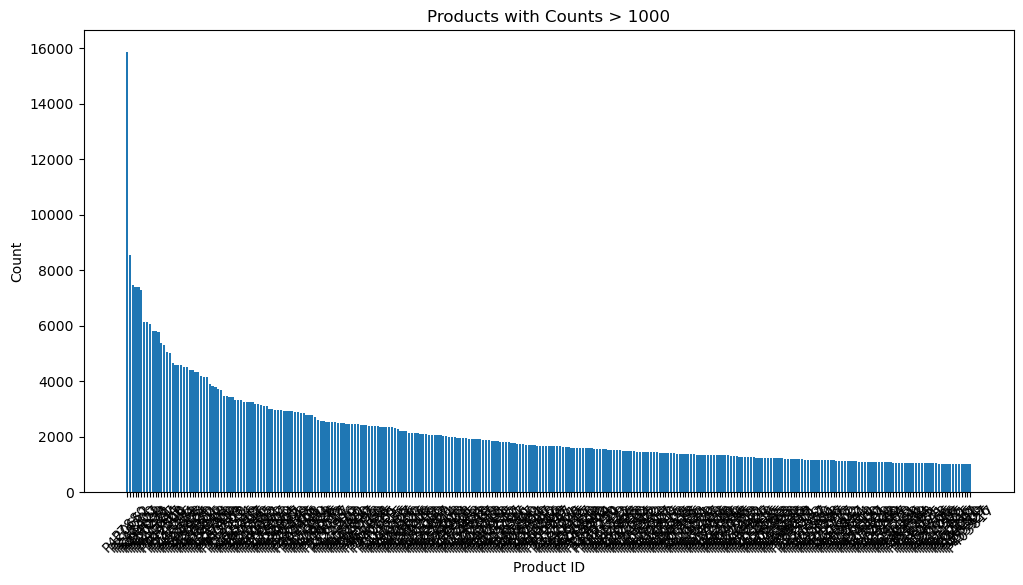

In [16]:
import matplotlib.pyplot as plt

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_counts_df['product_id'], sorted_counts_df['Count'])
plt.xlabel('Product ID')
plt.ylabel('Count')
plt.title('Products with Counts > 1000')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Top 20 Products
# Group by product_id and aggregate author_id into a list
grouped_data = reviews.groupby('product_name')['author_id'].apply(list)

# Calculate count of unique author_id values for each product_id
counts = grouped_data.apply(lambda x: len(set(x)))

# Sort the counts in descending order
sorted_counts = counts.sort_values(ascending=False)

# Select the top 20 products with highest counts
# top_20_products = sorted_counts.head(20)
# top_20_products_df = top_20_products.rename(columns={'product_id': 'quantities_sold'})
# top_20_products_df

sorted_counts_df = counts_df.sort_values(by='Count', ascending=False)
top_20_products = sorted_counts_df.head(20)
top_20_products_df = top_20_products.rename(columns={'Count': 'quantities_sold'})
top_20_products_df = top_20_products_df.reset_index(drop=True)
top_20_products_df

,product_id,quantities_sold
0,P420652,15853
1,P7880,8544
2,P218700,7461
3,P248407,7385
4,P269122,7378
5,P394639,7287
6,P417238,6148
7,P450271,6148
8,P427421,6056
9,P411387,5810


In [18]:
# what brand are they from?

# Merge top 20 products with product_info
merged_df = pd.merge(top_20_products_df, product_info, on='product_id', how='left')
merged_df

# # Select the desired columns (quantities_sold, brand_id, brand_name)
# result_df = merged_df[['quantities_sold', 'brand_id', 'brand_name']]

# # Display the result
# print(result_df)


,product_id,quantities_sold,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P420652,15853,Lip Sleeping Mask Intense Hydration with Vitam...,6125,LANEIGE,1081315,4.3508,16118.0,0.7 oz/ 20 g,Color,...,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
1,P7880,8544,Soy Hydrating Gentle Face Cleanser,4348,fresh,282865,4.3628,8733.0,5 oz/ 150 mL,Size,...,0,0,0,"['Clean at Sephora', 'Best for Dry, Combo, Nor...",Skincare,Cleansers,Face Wash & Cleansers,2,71.0,15.0
2,P218700,7461,100 percent Pure Argan Oil,5922,Josie Maran,134089,4.4998,7763.0,1.7 oz/ 50 mL,Size,...,0,0,0,"['Cruelty-Free', 'Clean at Sephora']",Skincare,Moisturizers,Face Oils,2,96.0,18.0
3,P248407,7385,Ultra Repair Cream Intense Hydration,5972,First Aid Beauty,300432,4.5200,7539.0,6 oz/ 170 g,Size,...,0,0,0,"['Best for Dry Skin', 'Community Favorite', 'C...",Skincare,Moisturizers,Moisturizers,3,48.0,18.0
4,P269122,7378,Alpha Beta Extra Strength Daily Peel Pads,5668,Dr. Dennis Gross Skincare,234295,4.5455,7412.0,30 Treatments + 5 Bonus,Size,...,0,0,1,"['Good for: Dullness/Uneven Texture', 'Clean a...",Skincare,Treatments,Facial Peels,2,153.0,20.0
5,P394639,7287,The True Cream Aqua Bomb,7075,belif,265050,4.4841,7292.0,1.68 oz/ 50 mL,Size,...,0,0,0,NaN,Skincare,Moisturizers,Moisturizers,2,65.0,22.0
6,P417238,6148,Green Clean Makeup Removing Cleansing Balm,8001,Farmacy,403801,4.4958,6158.0,3.4 oz/ 100 mL,Size,...,0,0,1,"['Vegan', 'Good for: Dullness/Uneven Texture',...",Skincare,Cleansers,Makeup Removers,2,60.0,24.0
7,P450271,6148,Green Clean Makeup Meltaway Cleansing Balm Lim...,8001,Farmacy,0,4.4958,6158.0,6.8 oz/ 200 mL,Size,...,0,0,1,"['Good for: Dullness/Uneven Texture', 'Communi...",Skincare,Cleansers,Face Wash & Cleansers,0,NaN,NaN
8,P427421,6056,Protini Polypeptide Firming Refillable Moistur...,7083,Drunk Elephant,411372,3.9620,6048.0,1.69 oz/ 50 mL,Size,...,0,0,0,"['Refill Available', 'Good for: Dullness/Uneve...",Skincare,Moisturizers,Moisturizers,3,98.0,22.0
9,P411387,5810,Superfood Antioxidant Cleanser,6169,Youth To The People,404142,4.2112,5851.0,8 oz/ 237 mL,Size,...,0,0,0,"['Vegan', 'Refill Available', 'Good for: Pores...",Skincare,Cleansers,Face Wash & Cleansers,2,68.0,14.0


## Knowing each column (unique values, value counts, and isnull):

1. skin_tone
2. eye_color
3. skin_type
4. hair_color

In [19]:
# unique input for skin_tone
reviews['skin_tone'].unique()

array(['light', 'fair', 'dark', 'lightMedium', nan, 'deep', 'olive',
       'mediumTan', 'medium', 'tan', 'fairLight', 'rich', 'porcelain',
       'notSureST', 'ebony'], dtype=object)

In [20]:
#replace 'notSureST' with NaN
reviews['skin_tone'].replace('notSureST', np.nan, inplace=True)

In [21]:
# how many for each unique input
reviews['skin_tone'].value_counts()

light          318476
fair           247791
lightMedium    235173
medium          84322
mediumTan       74536
fairLight       67254
tan             40282
deep            24652
rich             6561
olive            2085
porcelain        1941
dark              646
ebony               3
Name: skin_tone, dtype: int64

In [22]:
# how many are NaN
null_skin_tone = reviews['skin_tone'].isnull().sum()
null_skin_tone

197414

In [23]:
# unique input for eye_color
reviews['eye_color'].unique()

array([nan, 'brown', 'blue', 'hazel', 'green', 'Grey', 'gray'],
      dtype=object)

In [24]:
# replace 'gray' with 'grey' and change 'Grey' to 'grey'
reviews['eye_color'] = reviews['eye_color'].replace(['gray', 'Grey'], 'grey', regex=True)

In [25]:
# how many for each unique input
reviews['eye_color'].value_counts()

brown    563118
blue     205706
hazel    141287
green    141209
grey       6414
Name: eye_color, dtype: int64

In [26]:
# how many are NaN
null_eye_color = reviews['eye_color'].isnull().sum()
null_eye_color

243402

In [27]:
# unique input for skin_type
reviews['skin_type'].unique()

array(['combination', 'oily', nan, 'dry', 'normal'], dtype=object)

In [28]:
# how many for each unique input
reviews['skin_type'].value_counts()

combination    650631
dry            220813
normal         157466
oily           143920
Name: skin_type, dtype: int64

In [29]:
# how many are NaN
null_skin_type = reviews['skin_type'].isnull().sum()
null_skin_type

128306

In [30]:
# unique input for hair_color
reviews['hair_color'].unique()

array([nan, 'brown', 'black', 'blonde', 'red', 'auburn', 'brunette',
       'gray'], dtype=object)

In [31]:
# how many for each unique input
reviews['hair_color'].value_counts()

brown       482462
blonde      242830
black       224644
auburn       37497
red          30934
brunette     12966
gray          6491
Name: hair_color, dtype: int64

In [32]:
# how many are NaN
null_hair_color = reviews['hair_color'].isnull().sum()
null_hair_color

263312

# Total NaN for all 4 demographics

% of NaN for each demographics

In [33]:
print("Skin Tone: " + str(int(null_skin_tone/ len(reviews) * 100)) + "%")
print("Eye Colour: " + str(int(null_eye_color/ len(reviews) * 100)) + "%")
print("Skin Type: " + str(int(null_skin_type / len(reviews) * 100)) + "%")
print("Hair Colour: " + str(int(null_hair_color / len(reviews) * 100)) + "%")

Skin Tone: 15%
Eye Colour: 18%
Skin Type: 9%
Hair Colour: 20%


How many NaN in each demographic?

In [34]:
null_counts = reviews[['skin_type', 'skin_tone', 'eye_color', 'hair_color']].isnull().sum()
null_counts

skin_type     128306
skin_tone     197414
eye_color     243402
hair_color    263312
dtype: int64

How does it look like in a graph?

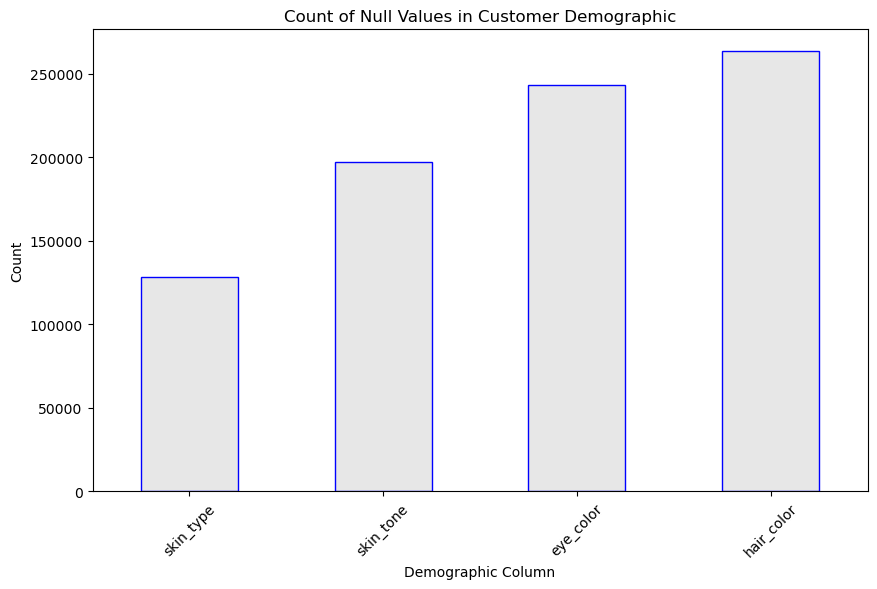

In [35]:
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.title('Count of Null Values in Customer Demographic')
plt.xlabel('Demographic Column')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

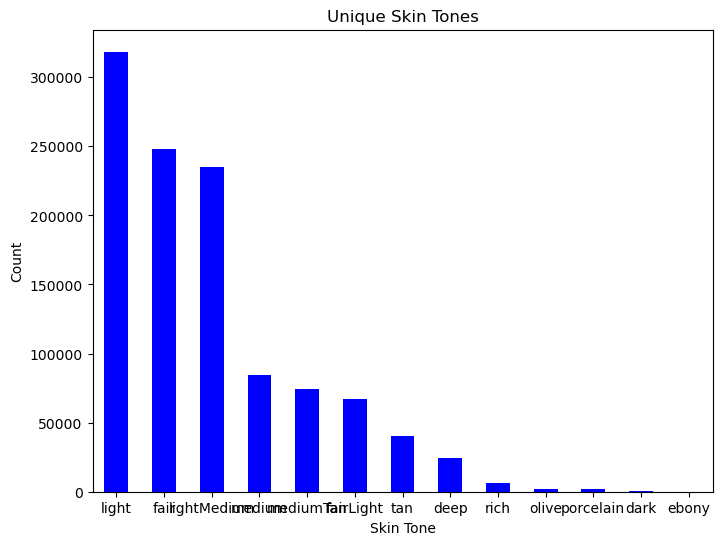

In [36]:
import matplotlib.pyplot as plt

# Get the unique values and their counts
skin_tone_counts = reviews['skin_tone'].value_counts()

# Plot the unique values of skin tone
plt.figure(figsize=(8, 6))
skin_tone_counts.plot(kind='bar', color='blue')
plt.title('Unique Skin Tones')
plt.xlabel('Skin Tone')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



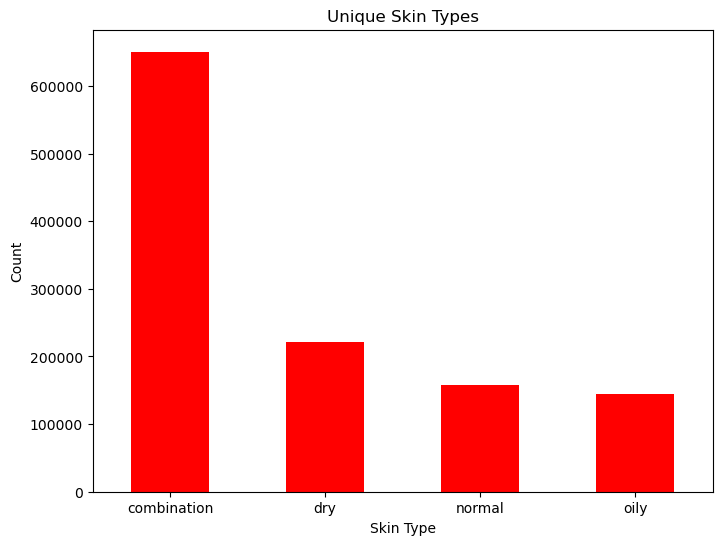

In [37]:
import matplotlib.pyplot as plt

# Get the unique values and their counts
skin_type_counts = reviews['skin_type'].value_counts()

# Plot the unique values of skin type
plt.figure(figsize=(8, 6))
skin_type_counts.plot(kind='bar', color='red')
plt.title('Unique Skin Types')
plt.xlabel('Skin Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


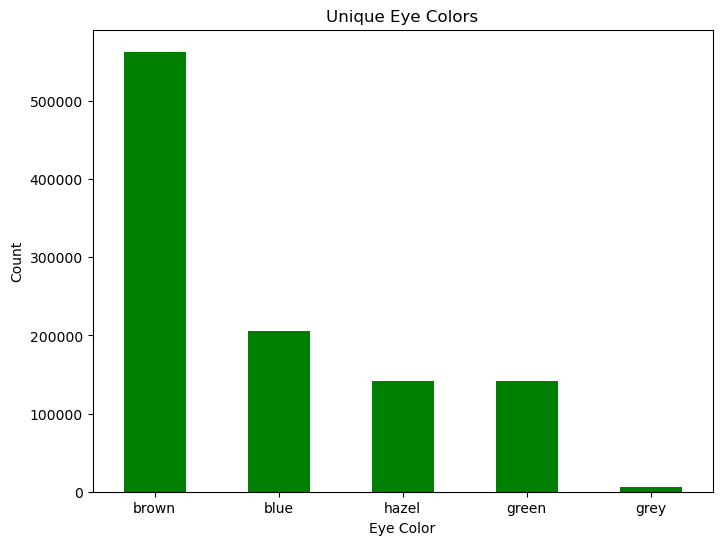

In [38]:
import matplotlib.pyplot as plt

# Get the unique values and their counts
eye_color_counts = reviews['eye_color'].value_counts()

# Plot the unique values of eye color
plt.figure(figsize=(8, 6))
eye_color_counts.plot(kind='bar', color='green')
plt.title('Unique Eye Colors')
plt.xlabel('Eye Color')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


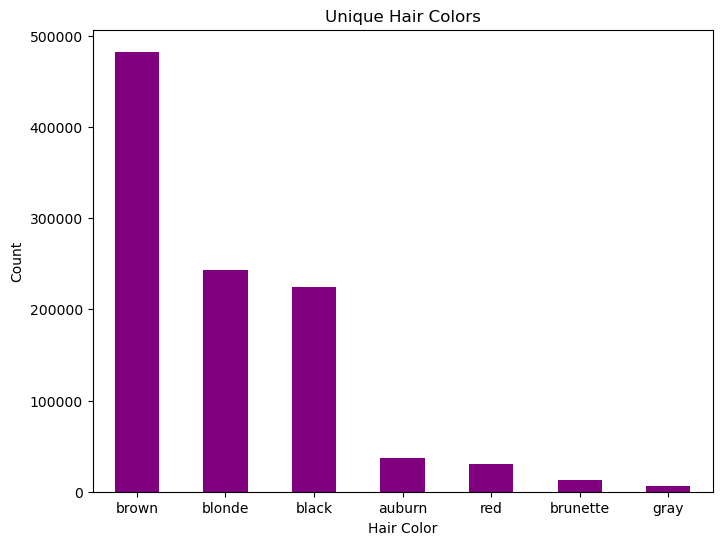

In [39]:
import matplotlib.pyplot as plt

# Get the unique values and their counts
hair_color_counts = reviews['hair_color'].value_counts()

# Plot the unique values of hair color
plt.figure(figsize=(8, 6))
hair_color_counts.plot(kind='bar', color='purple')
plt.title('Unique Hair Colors')
plt.xlabel('Hair Color')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


How many NaN in customer's demographic?

In [40]:
nan_counts = nan_rows.isnull().sum(axis=1).value_counts()
nan_counts

4    121738
2     63902
3     56467
1     48201
dtype: int64

How does it look like in a graph?

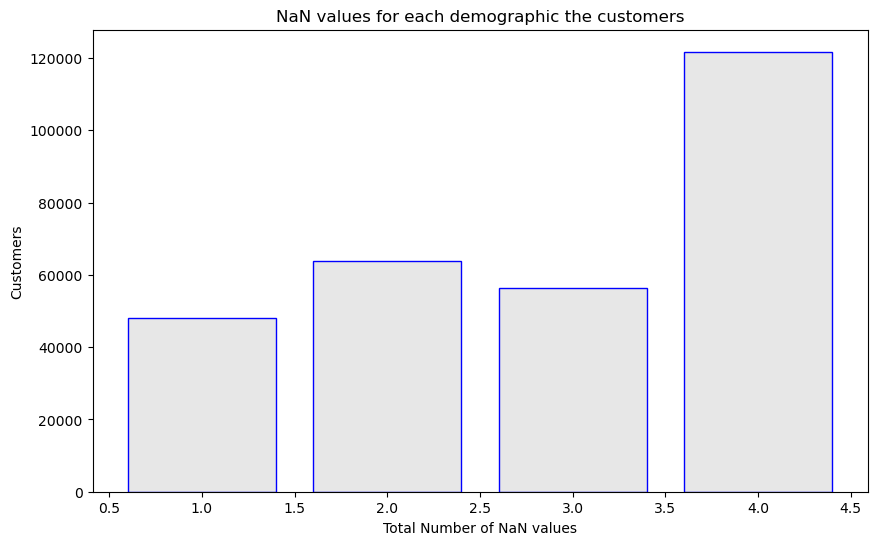

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(nan_counts.index, nan_counts.values, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.xlabel('Total Number of NaN values')
plt.ylabel('Customers')
plt.title('NaN values for each demographic the customers')
plt.show()

# 🧹Dealing with NaN values

In [42]:
# update missing values (from 290 308 to 290 377)
nan_rows = reviews.iloc[:, 2:6][reviews.iloc[:, 2:6].isnull().any(axis=1)]
nan_rows

,skin_tone,eye_color,skin_type,hair_color
24874,light,NaN,combination,NaN
484785,light,NaN,combination,NaN
483182,light,NaN,combination,NaN
133040,fair,NaN,oily,NaN
104853,fair,NaN,oily,NaN
...,...,...,...,...
92201,medium,brown,combination,NaN
81657,light,hazel,combination,NaN
81656,NaN,brown,combination,NaN
79158,NaN,NaN,NaN,NaN


In [43]:
# Remove all 4 customers demographics == Nan
nan_values = reviews[reviews['skin_tone'].isnull() & reviews['eye_color'].isnull() & reviews['skin_type'].isnull() & reviews['hair_color'].isnull()]
display(nan_values.head())
print(nan_values.shape)

,author_id,submission_time,skin_tone,eye_color,skin_type,hair_color,product_id,product_name
24873,55481002,2008-08-30,NaN,NaN,NaN,NaN,P7880,Soy Hydrating Gentle Face Cleanser
192136,1047420560,2008-09-01,NaN,NaN,NaN,NaN,P12573,Intense Therapy Lip Balm SPF 25
282496,1214759867,2008-09-02,NaN,NaN,NaN,NaN,P173726,Facial Cotton
205893,1199601470,2008-09-03,NaN,NaN,NaN,NaN,P481817,"Beauty Elixir Prep, Set, Glow Face Mist"
24867,1100324666,2008-09-06,NaN,NaN,NaN,NaN,P7880,Soy Hydrating Gentle Face Cleanser


(121738, 8)


In [44]:
#drop all and replace reviews dataset
reviews.dropna(subset=['skin_tone', 'eye_color', 'skin_type', 'hair_color'], how='all', inplace=True)

In [45]:
# check if there are fewer rows. 1179398 is correct. 1301136 is the total # of rows before dropna
reviews.shape

(1179398, 8)

# Replace NaN
1. find same customer to replace
2. use KNNimputer to imputer missing data

In [46]:
# sift out all the duplicates
duplicate_rows = reviews[reviews.duplicated(subset='author_id', keep=False)][['author_id',"skin_tone","eye_color","skin_type","hair_color"]]
display(duplicate_rows.head())
print(duplicate_rows.shape)

,author_id,skin_tone,eye_color,skin_type,hair_color
484785,927434292,light,NaN,combination,NaN
483182,927434292,light,NaN,combination,NaN
133040,411867282,fair,NaN,oily,NaN
104853,411867282,fair,NaN,oily,NaN
473493,1309726069,light,NaN,NaN,NaN


(906988, 5)


In [47]:
# how many NaN are there?
duplicate_rows.isnull().sum()

author_id         0
skin_tone     51178
eye_color     75044
skin_type      3518
hair_color    92344
dtype: int64

In [48]:
# find duplicate authors and replace NaN values, if any
unique_authors = duplicate_rows.fillna("").groupby("author_id").max()
unique_authors = unique_authors.replace('', np.nan)

In [49]:
display(unique_authors.head())
print(unique_authors.shape)

,skin_tone,eye_color,skin_type,hair_color
author_id,,,,
561736,light,blue,combination,blonde
582399,fair,hazel,combination,brown
834281,light,green,oily,blonde
917434,light,green,oily,blonde
1096829,light,brown,combination,black


(244533, 4)


In [50]:
# check again if there is improvement?
unique_authors.isnull().sum()

skin_tone     10400
eye_color     21675
skin_type       885
hair_color    22181
dtype: int64

In [51]:
# check columns for reviews dataset
reviews.columns

Index(['author_id', 'submission_time', 'skin_tone', 'eye_color', 'skin_type',
       'hair_color', 'product_id', 'product_name'],
      dtype='object')

In [52]:
# check columns for cleaned dataset
unique_authors.columns

Index(['skin_tone', 'eye_color', 'skin_type', 'hair_color'], dtype='object')

In [53]:
# missing 'author_id', reset index. prepare to merge
unique_authors.reset_index(inplace=True)

In [54]:
# merged the replaced doc with the reviews dataset
merged = pd.merge (reviews, unique_authors, on= 'author_id', how='outer')
display(merged.head())
print(merged.shape)

,author_id,submission_time,skin_tone_x,eye_color_x,skin_type_x,hair_color_x,product_id,product_name,skin_tone_y,eye_color_y,skin_type_y,hair_color_y
0,1386893505,2008-08-28,light,NaN,combination,NaN,P7880,Soy Hydrating Gentle Face Cleanser,NaN,NaN,NaN,NaN
1,927434292,2008-08-28,light,NaN,combination,NaN,P449599,Mini Anti-Aging Cleansing Gel,light,NaN,combination,NaN
2,927434292,2008-08-28,light,NaN,combination,NaN,P39274,Anti-Aging Cleansing Gel,light,NaN,combination,NaN
3,927434292,2010-03-30,light,NaN,combination,NaN,P248404,Pure Skin Face Cleanser,light,NaN,combination,NaN
4,411867282,2008-08-29,fair,NaN,oily,NaN,P4010,AHA/BHA Exfoliating Cleanser,fair,NaN,oily,NaN


(1179398, 12)


In [55]:
# merged x and y to form a new column with no x and y
merged['skin_tone'] = merged['skin_tone_x'].combine_first(merged['skin_tone_y'])
merged['eye_color'] = merged['eye_color_x'].combine_first(merged['eye_color_y'])
merged['skin_type'] = merged['skin_type_x'].combine_first(merged['skin_type_y'])
merged['hair_color'] = merged['hair_color_x'].combine_first(merged['hair_color_y'])

In [56]:
# removed all demographics with _x and _y
columns_to_remove = ['skin_tone_x','eye_color_x','skin_type_x','hair_color_x','skin_tone_y','eye_color_y','skin_type_y','hair_color_y']
merged.drop(columns=columns_to_remove, inplace=True)

In [57]:
# print and check
display(merged.head())
print(merged.shape)

,author_id,submission_time,product_id,product_name,skin_tone,eye_color,skin_type,hair_color
0,1386893505,2008-08-28,P7880,Soy Hydrating Gentle Face Cleanser,light,NaN,combination,NaN
1,927434292,2008-08-28,P449599,Mini Anti-Aging Cleansing Gel,light,NaN,combination,NaN
2,927434292,2008-08-28,P39274,Anti-Aging Cleansing Gel,light,NaN,combination,NaN
3,927434292,2010-03-30,P248404,Pure Skin Face Cleanser,light,NaN,combination,NaN
4,411867282,2008-08-29,P4010,AHA/BHA Exfoliating Cleanser,fair,NaN,oily,NaN


(1179398, 8)


In [58]:
# count how many null values
merged.isnull().sum()

author_id               0
submission_time         0
product_id              0
product_name            0
skin_tone           50911
eye_color          103645
skin_type            5354
hair_color         107728
dtype: int64

In [59]:
# rows with no missing values. improved 43,250 rows!
merged.dropna()

,author_id,submission_time,product_id,product_name,skin_tone,eye_color,skin_type,hair_color
16,1309726069,2008-08-29,P122774,All About Eyes Eye Cream,light,brown,combination,black
17,1309726069,2008-08-29,P122882,Clarifying Lotion 2,light,brown,combination,black
18,1309726069,2012-03-06,P126301,Take The Day Off Cleansing Balm Makeup Remover,light,brown,combination,black
19,1309726069,2012-03-06,P453816,Mini Take The Day Off Cleansing Balm Makeup Re...,light,brown,combination,black
20,1309726069,2018-01-19,P427417,Niacinamide 10% + Zinc 1% Oil Control Serum,light,brown,combination,black
...,...,...,...,...,...,...,...,...
1179390,44474500565,2023-03-21,P500982,Water Bank Cleansing Foam,light,blue,combination,brown
1179391,12257249172,2023-03-21,P421275,Salicylic Acid Acne Healing Dots,fairLight,brown,oily,blonde
1179393,45931821665,2023-03-21,P438620,Nourishing Moisturizer with Prebiotics,fairLight,green,dry,blonde
1179396,38448043795,2023-03-21,P467652,Lip Sleeping Mask,fair,blue,oily,brown


In [60]:
merged.head()

,author_id,submission_time,product_id,product_name,skin_tone,eye_color,skin_type,hair_color
0,1386893505,2008-08-28,P7880,Soy Hydrating Gentle Face Cleanser,light,NaN,combination,NaN
1,927434292,2008-08-28,P449599,Mini Anti-Aging Cleansing Gel,light,NaN,combination,NaN
2,927434292,2008-08-28,P39274,Anti-Aging Cleansing Gel,light,NaN,combination,NaN
3,927434292,2010-03-30,P248404,Pure Skin Face Cleanser,light,NaN,combination,NaN
4,411867282,2008-08-29,P4010,AHA/BHA Exfoliating Cleanser,fair,NaN,oily,NaN


# KNNImputer

# KNNimputer for 1 skin_tone == NaN

In [61]:
# demongraphic rows with 1 NaN 
merged[merged.isnull().sum(axis=1) == 1] 

,author_id,submission_time,product_id,product_name,skin_tone,eye_color,skin_type,hair_color
907,1175348219,2008-09-12,P12336,Rose Face Mask,fair,brown,combination,NaN
908,1175348219,2009-08-28,P232327,Broad Spectrum SPF 50 Sunscreen Face Cream,fair,brown,combination,NaN
909,1175348219,2010-05-02,P248407,Ultra Repair Cream Intense Hydration,fair,brown,combination,NaN
910,1175348219,2016-01-15,P294018,Cleansing Spa Water Cloths,fair,brown,combination,NaN
1125,1158244323,2008-09-13,P94421,Vinoperfect Radiance Dark Spot Serum Vitamin C...,light,hazel,combination,NaN
...,...,...,...,...,...,...,...,...
1179376,37294728855,2023-03-21,P433520,Magic Cream Moisturizer with Hyaluronic Acid,fair,brown,combination,NaN
1179384,28939616282,2023-03-21,P503692,Plush Puddin’ Intensive Recovery Lip Mask With...,NaN,hazel,combination,blonde
1179385,5912696135,2023-03-21,P482323,(Re) Setting Refreshing Mist SPF 40,NaN,green,dry,blonde
1179386,6741606023,2023-03-21,P474332,Bye Bye Lines 1.5% Hyaluronic Acid Serum,fair,blue,combination,NaN


In [62]:
# retrieve all rows with demograhics != Nan & only skin_tone == NaN 
first_train_merged = merged[(merged.isnull().sum(axis=1) == 0) | ((merged.isnull().sum(axis=1) == 1) & (merged['skin_tone'].isnull()))]
first_train_merged
# this is my train set:

,author_id,submission_time,product_id,product_name,skin_tone,eye_color,skin_type,hair_color
16,1309726069,2008-08-29,P122774,All About Eyes Eye Cream,light,brown,combination,black
17,1309726069,2008-08-29,P122882,Clarifying Lotion 2,light,brown,combination,black
18,1309726069,2012-03-06,P126301,Take The Day Off Cleansing Balm Makeup Remover,light,brown,combination,black
19,1309726069,2012-03-06,P453816,Mini Take The Day Off Cleansing Balm Makeup Re...,light,brown,combination,black
20,1309726069,2018-01-19,P427417,Niacinamide 10% + Zinc 1% Oil Control Serum,light,brown,combination,black
...,...,...,...,...,...,...,...,...
1179390,44474500565,2023-03-21,P500982,Water Bank Cleansing Foam,light,blue,combination,brown
1179391,12257249172,2023-03-21,P421275,Salicylic Acid Acne Healing Dots,fairLight,brown,oily,blonde
1179393,45931821665,2023-03-21,P438620,Nourishing Moisturizer with Prebiotics,fairLight,green,dry,blonde
1179396,38448043795,2023-03-21,P467652,Lip Sleeping Mask,fair,blue,oily,brown


In [63]:
# encode customer demograohics
encoded_merged = pd.get_dummies(first_train_merged, columns=['skin_tone', 'skin_type', 'eye_color', 'hair_color'])
encoded_merged

,author_id,submission_time,product_id,product_name,skin_tone_dark,skin_tone_deep,skin_tone_ebony,skin_tone_fair,skin_tone_fairLight,skin_tone_light,...,eye_color_green,eye_color_grey,eye_color_hazel,hair_color_auburn,hair_color_black,hair_color_blonde,hair_color_brown,hair_color_brunette,hair_color_gray,hair_color_red
16,1309726069,2008-08-29,P122774,All About Eyes Eye Cream,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
17,1309726069,2008-08-29,P122882,Clarifying Lotion 2,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
18,1309726069,2012-03-06,P126301,Take The Day Off Cleansing Balm Makeup Remover,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
19,1309726069,2012-03-06,P453816,Mini Take The Day Off Cleansing Balm Makeup Re...,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
20,1309726069,2018-01-19,P427417,Niacinamide 10% + Zinc 1% Oil Control Serum,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179390,44474500565,2023-03-21,P500982,Water Bank Cleansing Foam,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1179391,12257249172,2023-03-21,P421275,Salicylic Acid Acne Healing Dots,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1179393,45931821665,2023-03-21,P438620,Nourishing Moisturizer with Prebiotics,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1179396,38448043795,2023-03-21,P467652,Lip Sleeping Mask,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [64]:
# use KNNImputer to imputer rows with only skin_tone == NaN 

from sklearn.impute import KNNImputer

# Select the columns for imputation
columns_to_impute = encoded_merged.columns[4:]

# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the selected columns
first_imputed_merged = encoded_merged.copy()
first_imputed_merged[columns_to_impute] = imputer.fit_transform(encoded_merged[columns_to_impute])
first_imputed_merged.shape

(1059588, 33)

# KNNimputer for 1 skin_type == NaN

In [65]:
# retrieve all rows with demograhics != Nan & only skin_type == NaN 
second_train_merged = merged[(merged.isnull().sum(axis=1) == 0) | ((merged.isnull().sum(axis=1) == 1) & (merged['skin_type'].isnull()))]
second_train_merged
# this is my train set:

,author_id,submission_time,product_id,product_name,skin_tone,eye_color,skin_type,hair_color
16,1309726069,2008-08-29,P122774,All About Eyes Eye Cream,light,brown,combination,black
17,1309726069,2008-08-29,P122882,Clarifying Lotion 2,light,brown,combination,black
18,1309726069,2012-03-06,P126301,Take The Day Off Cleansing Balm Makeup Remover,light,brown,combination,black
19,1309726069,2012-03-06,P453816,Mini Take The Day Off Cleansing Balm Makeup Re...,light,brown,combination,black
20,1309726069,2018-01-19,P427417,Niacinamide 10% + Zinc 1% Oil Control Serum,light,brown,combination,black
...,...,...,...,...,...,...,...,...
1179390,44474500565,2023-03-21,P500982,Water Bank Cleansing Foam,light,blue,combination,brown
1179391,12257249172,2023-03-21,P421275,Salicylic Acid Acne Healing Dots,fairLight,brown,oily,blonde
1179393,45931821665,2023-03-21,P438620,Nourishing Moisturizer with Prebiotics,fairLight,green,dry,blonde
1179396,38448043795,2023-03-21,P467652,Lip Sleeping Mask,fair,blue,oily,brown


In [66]:
# encode customer demograohics
second_encoded_merged = pd.get_dummies(second_train_merged, columns=['skin_tone', 'skin_type', 'eye_color', 'hair_color'])
second_encoded_merged

,author_id,submission_time,product_id,product_name,skin_tone_dark,skin_tone_deep,skin_tone_ebony,skin_tone_fair,skin_tone_fairLight,skin_tone_light,...,eye_color_green,eye_color_grey,eye_color_hazel,hair_color_auburn,hair_color_black,hair_color_blonde,hair_color_brown,hair_color_brunette,hair_color_gray,hair_color_red
16,1309726069,2008-08-29,P122774,All About Eyes Eye Cream,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
17,1309726069,2008-08-29,P122882,Clarifying Lotion 2,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
18,1309726069,2012-03-06,P126301,Take The Day Off Cleansing Balm Makeup Remover,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
19,1309726069,2012-03-06,P453816,Mini Take The Day Off Cleansing Balm Makeup Re...,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
20,1309726069,2018-01-19,P427417,Niacinamide 10% + Zinc 1% Oil Control Serum,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179390,44474500565,2023-03-21,P500982,Water Bank Cleansing Foam,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1179391,12257249172,2023-03-21,P421275,Salicylic Acid Acne Healing Dots,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1179393,45931821665,2023-03-21,P438620,Nourishing Moisturizer with Prebiotics,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1179396,38448043795,2023-03-21,P467652,Lip Sleeping Mask,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [67]:
# use KNNImputer to imputer rows with only skin_type == NaN 

from sklearn.impute import KNNImputer

# Select the columns for imputation
columns_to_impute = second_encoded_merged.columns[4:]

# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5)

# # Fit and transform the selected columns
second_imputed_merged = second_encoded_merged.copy()
second_imputed_merged[columns_to_impute] = imputer.fit_transform(second_encoded_merged[columns_to_impute])
second_imputed_merged.shape

(1054534, 33)

# KNNimputer for 1 eye_color == NaN

In [68]:
# retrieve all rows with demograhics != Nan & only eye_color == NaN 
third_train_merged = merged[(merged.isnull().sum(axis=1) == 0) | ((merged.isnull().sum(axis=1) == 1) & (merged['eye_color'].isnull()))]
third_train_merged
# this is my train set:

,author_id,submission_time,product_id,product_name,skin_tone,eye_color,skin_type,hair_color
16,1309726069,2008-08-29,P122774,All About Eyes Eye Cream,light,brown,combination,black
17,1309726069,2008-08-29,P122882,Clarifying Lotion 2,light,brown,combination,black
18,1309726069,2012-03-06,P126301,Take The Day Off Cleansing Balm Makeup Remover,light,brown,combination,black
19,1309726069,2012-03-06,P453816,Mini Take The Day Off Cleansing Balm Makeup Re...,light,brown,combination,black
20,1309726069,2018-01-19,P427417,Niacinamide 10% + Zinc 1% Oil Control Serum,light,brown,combination,black
...,...,...,...,...,...,...,...,...
1179390,44474500565,2023-03-21,P500982,Water Bank Cleansing Foam,light,blue,combination,brown
1179391,12257249172,2023-03-21,P421275,Salicylic Acid Acne Healing Dots,fairLight,brown,oily,blonde
1179393,45931821665,2023-03-21,P438620,Nourishing Moisturizer with Prebiotics,fairLight,green,dry,blonde
1179396,38448043795,2023-03-21,P467652,Lip Sleeping Mask,fair,blue,oily,brown


In [69]:
# encode customer demograohics
third_encoded_merged = pd.get_dummies(third_train_merged, columns=['skin_tone', 'skin_type', 'eye_color', 'hair_color'])
third_encoded_merged

,author_id,submission_time,product_id,product_name,skin_tone_dark,skin_tone_deep,skin_tone_ebony,skin_tone_fair,skin_tone_fairLight,skin_tone_light,...,eye_color_green,eye_color_grey,eye_color_hazel,hair_color_auburn,hair_color_black,hair_color_blonde,hair_color_brown,hair_color_brunette,hair_color_gray,hair_color_red
16,1309726069,2008-08-29,P122774,All About Eyes Eye Cream,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
17,1309726069,2008-08-29,P122882,Clarifying Lotion 2,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
18,1309726069,2012-03-06,P126301,Take The Day Off Cleansing Balm Makeup Remover,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
19,1309726069,2012-03-06,P453816,Mini Take The Day Off Cleansing Balm Makeup Re...,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
20,1309726069,2018-01-19,P427417,Niacinamide 10% + Zinc 1% Oil Control Serum,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179390,44474500565,2023-03-21,P500982,Water Bank Cleansing Foam,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1179391,12257249172,2023-03-21,P421275,Salicylic Acid Acne Healing Dots,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1179393,45931821665,2023-03-21,P438620,Nourishing Moisturizer with Prebiotics,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1179396,38448043795,2023-03-21,P467652,Lip Sleeping Mask,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [70]:
# use KNNImputer to imputer rows with only eye_color == NaN 

from sklearn.impute import KNNImputer

# Select the columns for imputation
columns_to_impute = third_encoded_merged.columns[4:]

# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5)

# # Fit and transform the selected columns
third_imputed_merged = third_encoded_merged.copy()
third_imputed_merged[columns_to_impute] = imputer.fit_transform(third_encoded_merged[columns_to_impute])
third_imputed_merged.shape

(1065035, 33)

# KNNimputer for 1 hair_color == NaN

In [71]:
# retrieve all rows with demograhics != Nan & only hair_color == NaN 
fourth_train_merged = merged[(merged.isnull().sum(axis=1) == 0) | ((merged.isnull().sum(axis=1) == 1) & (merged['hair_color'].isnull()))]
fourth_train_merged
# this is my train set:

,author_id,submission_time,product_id,product_name,skin_tone,eye_color,skin_type,hair_color
16,1309726069,2008-08-29,P122774,All About Eyes Eye Cream,light,brown,combination,black
17,1309726069,2008-08-29,P122882,Clarifying Lotion 2,light,brown,combination,black
18,1309726069,2012-03-06,P126301,Take The Day Off Cleansing Balm Makeup Remover,light,brown,combination,black
19,1309726069,2012-03-06,P453816,Mini Take The Day Off Cleansing Balm Makeup Re...,light,brown,combination,black
20,1309726069,2018-01-19,P427417,Niacinamide 10% + Zinc 1% Oil Control Serum,light,brown,combination,black
...,...,...,...,...,...,...,...,...
1179390,44474500565,2023-03-21,P500982,Water Bank Cleansing Foam,light,blue,combination,brown
1179391,12257249172,2023-03-21,P421275,Salicylic Acid Acne Healing Dots,fairLight,brown,oily,blonde
1179393,45931821665,2023-03-21,P438620,Nourishing Moisturizer with Prebiotics,fairLight,green,dry,blonde
1179396,38448043795,2023-03-21,P467652,Lip Sleeping Mask,fair,blue,oily,brown


In [72]:
# encode customer demograohics
fourth_encoded_merged = pd.get_dummies(fourth_train_merged, columns=['skin_tone', 'skin_type', 'eye_color', 'hair_color'])
fourth_encoded_merged

,author_id,submission_time,product_id,product_name,skin_tone_dark,skin_tone_deep,skin_tone_ebony,skin_tone_fair,skin_tone_fairLight,skin_tone_light,...,eye_color_green,eye_color_grey,eye_color_hazel,hair_color_auburn,hair_color_black,hair_color_blonde,hair_color_brown,hair_color_brunette,hair_color_gray,hair_color_red
16,1309726069,2008-08-29,P122774,All About Eyes Eye Cream,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
17,1309726069,2008-08-29,P122882,Clarifying Lotion 2,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
18,1309726069,2012-03-06,P126301,Take The Day Off Cleansing Balm Makeup Remover,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
19,1309726069,2012-03-06,P453816,Mini Take The Day Off Cleansing Balm Makeup Re...,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
20,1309726069,2018-01-19,P427417,Niacinamide 10% + Zinc 1% Oil Control Serum,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179390,44474500565,2023-03-21,P500982,Water Bank Cleansing Foam,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1179391,12257249172,2023-03-21,P421275,Salicylic Acid Acne Healing Dots,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1179393,45931821665,2023-03-21,P438620,Nourishing Moisturizer with Prebiotics,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1179396,38448043795,2023-03-21,P467652,Lip Sleeping Mask,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [73]:
# use KNNImputer to imputer rows with only hair_color == NaN 

from sklearn.impute import KNNImputer

# Select the columns for imputation
columns_to_impute = fourth_encoded_merged.columns[4:]

# Create an instance of KNNImputer
imputer = KNNImputer(n_neighbors=5)

# # Fit and transform the selected columns
fourth_imputed_merged = fourth_encoded_merged.copy()
fourth_imputed_merged[columns_to_impute] = imputer.fit_transform(fourth_encoded_merged[columns_to_impute])
fourth_imputed_merged.shape

(1064159, 33)

In [74]:
# combine all 4 dataframe that has already been imputed
combined = first_imputed_merged.combine_first(second_imputed_merged)
combined = combined.combine_first(third_imputed_merged)
combined = combined.combine_first(fourth_imputed_merged)

In [75]:
# check how many unique authors there are
combined['author_id'].nunique()

450826

In [76]:
#dropped 'product_name' - dataset too messy 
# combined = combined.drop('product_name', axis=1)

In [77]:
#dropped 'submission_time' - dataset too messy 
combined = combined.drop('submission_time', axis=1)

In [78]:
# Drop the first letter from product_id values
combined['product_id'] = combined['product_id'].str[1:]

# change it to integer
combined['product_id'] = combined['product_id'].astype(int)

In [79]:
combined

,author_id,product_id,product_name,skin_tone_dark,skin_tone_deep,skin_tone_ebony,skin_tone_fair,skin_tone_fairLight,skin_tone_light,skin_tone_lightMedium,...,eye_color_green,eye_color_grey,eye_color_hazel,hair_color_auburn,hair_color_black,hair_color_blonde,hair_color_brown,hair_color_brunette,hair_color_gray,hair_color_red
16,1309726069,122774,All About Eyes Eye Cream,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17,1309726069,122882,Clarifying Lotion 2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18,1309726069,126301,Take The Day Off Cleansing Balm Makeup Remover,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19,1309726069,453816,Mini Take The Day Off Cleansing Balm Makeup Re...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20,1309726069,427417,Niacinamide 10% + Zinc 1% Oil Control Serum,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179390,44474500565,500982,Water Bank Cleansing Foam,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1179391,12257249172,421275,Salicylic Acid Acne Healing Dots,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1179393,45931821665,438620,Nourishing Moisturizer with Prebiotics,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1179396,38448043795,467652,Lip Sleeping Mask,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Market Basket Analysis

Support: how frequent an item appears

Confidence: how many times the if-then statements are found true

Lift: used to compare the expected Confidence and the actual Confidence

In [80]:
# adding in price_usd
merged_data = pd.merge(combined, product_info[['product_name', 'price_usd']], on='product_name', how='left')
merged_data

,author_id,product_id,product_name,skin_tone_dark,skin_tone_deep,skin_tone_ebony,skin_tone_fair,skin_tone_fairLight,skin_tone_light,skin_tone_lightMedium,...,eye_color_grey,eye_color_hazel,hair_color_auburn,hair_color_black,hair_color_blonde,hair_color_brown,hair_color_brunette,hair_color_gray,hair_color_red,price_usd
0,1309726069,122774,All About Eyes Eye Cream,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,37.0
1,1309726069,122882,Clarifying Lotion 2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20.0
2,1309726069,122882,Clarifying Lotion 2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,36.0
3,1309726069,126301,Take The Day Off Cleansing Balm Makeup Remover,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,38.0
4,1309726069,453816,Mini Take The Day Off Cleansing Balm Makeup Re...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091514,12257249172,421275,Salicylic Acid Acne Healing Dots,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.0
1091515,45931821665,438620,Nourishing Moisturizer with Prebiotics,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,18.0
1091516,38448043795,467652,Lip Sleeping Mask,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
1091517,38448043795,467652,Lip Sleeping Mask,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0


In [85]:
# remove duplicate rows
duplicate_rows = merged_data.duplicated(subset='author_id', keep=False)
filtered_duplicates = merged_data[duplicate_rows]


In [84]:
# remove usd lesser than 20 and more than 200
filtered_duplicates_price = filtered_duplicates[(filtered_duplicates['price_usd'] > 20) & (filtered_duplicates['price_usd'] < 200)]
filtered_duplicates_price

,author_id,product_id,product_name,skin_tone_dark,skin_tone_deep,skin_tone_ebony,skin_tone_fair,skin_tone_fairLight,skin_tone_light,skin_tone_lightMedium,...,eye_color_grey,eye_color_hazel,hair_color_auburn,hair_color_black,hair_color_blonde,hair_color_brown,hair_color_brunette,hair_color_gray,hair_color_red,price_usd
0,1309726069,122774,All About Eyes Eye Cream,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,37.0
2,1309726069,122882,Clarifying Lotion 2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,36.0
3,1309726069,126301,Take The Day Off Cleansing Balm Makeup Remover,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,38.0
6,1309726069,392648,Extra Illuminating Moisture Balm,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,74.0
7,1308644493,481817,"Beauty Elixir Prep, Set, Glow Face Mist",1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091486,6772754019,500245,C Beyond Triple Serum SPF 40 Mineral Sunscreen...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,64.0
1091487,6772754019,500245,C Beyond Triple Serum SPF 40 Mineral Sunscreen...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,64.0
1091498,6409646830,479327,Plum Plump Hyaluronic Acid Moisturizer,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,39.0
1091499,6409646830,500472,Mini Plum Plump Hyaluronic Acid Moisturizer,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21.0


In [86]:
# print combined groupby of product_id based on author_id
mbs = [a[1]['product_name'].tolist() for a in list (filtered_duplicates_price.groupby(['author_id']))]

In [87]:
mbs

[['Midnight Recovery Concentrate Moisturizing Face Oil',
  'Midnight Recovery Concentrate Moisturizing Face Oil',
  'Midnight Recovery Concentrate Moisturizing Face Oil',
  'Midnight Recovery Concentrate Moisturizing Face Oil'],
 ['Lip Sleeping Mask Intense Hydration with Vitamin C'],
 ['100 percent Pure Argan Oil',
  'Lip Sleeping Mask Intense Hydration with Vitamin C'],
 ['Water-Lock Moisturizer with Skin-Smoothing Peptides',
  'Hydro Masque Exfoliant'],
 ['Mini Revitalizing Supreme+ Youth Power Creme Moisturizer',
  'Revitalizing Supreme+ Youth Power Creme Moisturizer'],
 ['The Quench Quadralipid Rapid Recovery Facial Moisturizer',
  'ICE Ceramide Moisturizer with Vitamin F'],
 ['Moisturizing Eye Bomb with Squalane', 'Soy Hydrating Gentle Face Cleanser'],
 ['Mini Revitalizing Supreme+ Youth Power Creme Moisturizer',
  'Revitalizing Supreme+ Youth Power Creme Moisturizer'],
 ['100 percent Pure Argan Oil',
  'Mochi Mochi Luminous Plumping & Hydrating Moisturizer',
  'Mini Revitalizing

In [88]:
transactions = mbs

In [89]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Convert transactions into a suitable format for Apriori algorithm
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to extract frequent itemsets
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

Empty DataFrame
Columns: [support, itemsets]
Index: []


In [90]:
df

,"""Buffet"" + Copper Peptides 1%",(Glow)Setting 100% Mineral Powder SPF 35,(Re) Setting Refreshing Mist SPF 40,(Re)setting 100% Mineral Powder Sunscreen SPF 35 PA+++,+Retinol Vita C Power Serum,+Retinol Vitamin C Moisturizer,1% Vitamin A Retinol Serum,10 + 10 Moisturizer with 10% Vitamin C + 10% Peptide Complex + Ceramides,10 Day Results Kit,10% Azelaic Acid Booster,...,ZenBubble Bi-Phase Toner Serum,Zero Baggage Anti-Dark Circle Eye Cream,Zincscreen 100% Mineral Sunscreen Lotion SPF 40 PA+++,barrier+ Triple Lipid + Collagen Brightening Eye Treatment,goopglow Cloudberry Exfoliating Jelly Cleanser,needles no more 3-D LIP PLUMPFIX,needles no more Neck Sculpting Cream,pores no more Mattifying Hydrator Pore Minimizing Gel,pores no more Pore Purifying Cleanser,pores no more Vacuum Cleaner Pore Purifying Mask
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210048,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
210049,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
210050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
210051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
from apyori import apriori
rules = apriori(transactions = mbs, min_support = 0.002, min_confidence = 0.2)

In [92]:
results = list(rules)

In [93]:
results

[RelationRecord(items=frozenset({'5 Stars Retinol + Niacinamide Eye Serum', 'Floral Recovery Overnight Mask with Squalane'}), support=0.0024612835808105575, ordered_statistics=[OrderedStatistic(items_base=frozenset({'5 Stars Retinol + Niacinamide Eye Serum'}), items_add=frozenset({'Floral Recovery Overnight Mask with Squalane'}), confidence=0.3517006802721089, lift=67.28213387358588), OrderedStatistic(items_base=frozenset({'Floral Recovery Overnight Mask with Squalane'}), items_add=frozenset({'5 Stars Retinol + Niacinamide Eye Serum'}), confidence=0.47085610200364303, lift=67.28213387358586)]),
 RelationRecord(items=frozenset({'5 Stars Retinol + Niacinamide Eye Serum', 'Tea Elixir Niacinamide & Hyaluronic Acid Anti-Aging Serum'}), support=0.0025803011620876637, ordered_statistics=[OrderedStatistic(items_base=frozenset({'5 Stars Retinol + Niacinamide Eye Serum'}), items_add=frozenset({'Tea Elixir Niacinamide & Hyaluronic Acid Anti-Aging Serum'}), confidence=0.3687074829931973, lift=44.4

In [94]:
def inspect (results):
    lhs = [tuple(results[2][0][0]) for result in results]
    rhs = [tuple(results[2][0][1]) for result in results]
    support = [result[1] for result in results]
    confidence = [result[2][0][2] for result in results]
    lifts = [results[2][0][3] for result in results]
    return list(zip(lhs, rhs, support, confidence, lists))

In [95]:
def inspect(results):
    lhs = [list(result[2][0][0]) for result in results]
    rhs = [list(result[2][0][1]) for result in results]
    support = [result[1] for result in results]
    confidence = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, support, confidence, lifts))

In [96]:
from collections.abc import Iterable

def inspect(results):
    lhs = [list(result[0]) for result in results]
    rhs = [list(result[1]) if isinstance(result[1], Iterable) else [result[1]] for result in results]
    support = [result[2][0][2] for result in results]
    confidence = [result[2][0][3] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, support, confidence, lifts))

In [97]:
resultsindataframe = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Conviction', 'Support', 'Confidence', 'Lifts'])

In [98]:
resultsindataframe

,Left Hand Side,Conviction,Support,Confidence,Lifts
0,"[5 Stars Retinol + Niacinamide Eye Serum, Flor...",[0.0024612835808105575],0.351701,67.282134,67.282134
1,"[5 Stars Retinol + Niacinamide Eye Serum, Tea ...",[0.0025803011620876637],0.368707,44.408322,44.408322
2,"[5 Stars Retinol + Niacinamide Eye Serum, Vita...",[0.002423197954801883],0.346259,37.222435,37.222435
3,[Mini Abeille Royale Advanced Youth Watery Oil...,[0.0057556902305608585],1.000000,173.741108,173.741108
4,[Advanced Night Repair Synchronized Multi-Reco...,[0.011316191627827262],1.000000,88.368952,88.368952
...,...,...,...,...,...
90,"[Lotus Anti-Aging Night Moisturizer, Lotus Ant...",[0.0026564724141050116],0.530923,179.874120,179.874120
91,"[Mini Hyaluronic Serum, Mini Face Cream, Mini ...",[0.002280376857269356],0.676554,262.684156,262.684156
92,[Violet-C Brightening Serum 20% Vitamin C + 10...,[0.003480074076542587],0.310140,89.118795,89.118795
93,[Smart Clinical Repair Wrinkle Correcting Seru...,[0.004160854641447635],0.599863,140.003296,140.003296


In [99]:
# sort results accordint to support
sorted_results = resultsindataframe.sort_values('Support', ascending=False)
sorted_results

,Left Hand Side,Conviction,Support,Confidence,Lifts
69,[Mini Water Drench Hyaluronic Hydrating Moist...,[0.0037181092390967995],1.000000,253.993954,253.993954
27,"[Clearly Corrective Dark Spot Solution Duo, Cl...",[0.00418941886095414],1.000000,238.696591,238.696591
60,"[Mini Retinol Reform, Retinol Reform Treatment...",[0.0047226176250755765],1.000000,211.746976,211.746976
41,"[Glow Drops, Mini Glow Drops]",[0.0034229456375295757],1.000000,292.146036,292.146036
62,[Revitalizing Supreme+ Youth Power Creme Moist...,[0.012901505810438318],1.000000,77.510332,77.510332
...,...,...,...,...,...
92,[Violet-C Brightening Serum 20% Vitamin C + 10...,[0.003480074076542587],0.310140,89.118795,89.118795
65,[Violet-C Brightening Serum 20% Vitamin C + 10...,[0.003480074076542587],0.310140,53.442034,53.442034
28,[Rose & Hyaluronic Acid Deep Hydration Moistur...,[0.0020328202882129746],0.301554,14.350307,14.350307
12,[B-Hydra Intensive Hydration Serum with Hyalur...,[0.00228513756052044],0.286396,61.955074,61.955074


In [100]:
# retrieve support == 1
support_one_rows = sorted_results[sorted_results['Support'] == 1]
support_one_rows

,Left Hand Side,Conviction,Support,Confidence,Lifts
69,[Mini Water Drench Hyaluronic Hydrating Moist...,[0.0037181092390967995],1.0,253.993954,253.993954
27,"[Clearly Corrective Dark Spot Solution Duo, Cl...",[0.00418941886095414],1.0,238.696591,238.696591
60,"[Mini Retinol Reform, Retinol Reform Treatment...",[0.0047226176250755765],1.0,211.746976,211.746976
41,"[Glow Drops, Mini Glow Drops]",[0.0034229456375295757],1.0,292.146036,292.146036
62,[Revitalizing Supreme+ Youth Power Creme Moist...,[0.012901505810438318],1.0,77.510332,77.510332
43,"[Green Clean Makeup Removing Cleansing Balm, G...",[0.027483539868509377],1.0,36.385415,36.385415
39,"[GOOPGLOW Microderm Instant Glow Exfoliator, M...",[0.009840373619991145],1.0,101.622158,101.622158
58,[Mini Rare Earth Deep Pore Minimizing Cleansin...,[0.002356548109286704],1.0,424.349495,424.349495
37,[GOOPGLOW 15% Glycolic Acid Overnight Glow Pee...,[0.005603347726526163],1.0,178.464741,178.464741
45,[Mini Indigo Overnight Repair Serum in Cream T...,[0.005146320214422074],1.0,194.313599,194.313599


In [101]:
support_one_rows.shape

(26, 5)

# Decision Tree

**DATA PREPARATION**

In [ ]:
combined.head()

In [ ]:
# sort 'product_id'
combined = combined.sort_values('product_id')

In [ ]:
# groupby product_id based on author_id
grouped_data = combined.groupby('author_id')['product_id'].apply(list)
grouped_data

In [ ]:
# Convert the Series to a DataFrame
grouped_data_df = grouped_data.reset_index(name='product_id_list')
grouped_data_df

In [ ]:
# Merge the grouped_data_df DataFrame with the combined DataFrame
merged_data = pd.merge(combined, grouped_data_df, on='author_id')
merged_data

In [ ]:
# remove duplicates
merged_data = merged_data.drop_duplicates(subset=['author_id'])
merged_data

In [ ]:
# encode 'product_id'
one_hot_encoded = pd.get_dummies(merged_data['product_id'])
one_hot_encoded

**MODEL TRAINING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier

X = merged_data.iloc[:, 3:-1]
y = one_hot_encoded

In [ ]:
X

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
decision_tree = DecisionTreeClassifier()
multi_label_classifier = OneVsRestClassifier(decision_tree)
multi_label_classifier.fit(X_train, y_train)

**MODEL TESTING**

In [ ]:
y_pred = multi_label_classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred.shape

In [ ]:
y_test == y_pred

**MODEL EVALUATION**

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# calculate classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

In [ ]:
from collections import Counter
import numpy as np

# Convert NumPy array to a list
y_pred_list = y_pred.tolist()

# Convert list elements to tuples
y_pred_tuples = [tuple(x) for x in y_pred_list]

# Count the occurrences of each tuple
counter = Counter(y_pred_tuples)

# Print the counts
print(counter)

In [ ]:
# show confusion matrix
from sklearn.metrics import confusion_matrix

for i in range(y_pred.shape[1]):
    label_name = y.columns[i]
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    print(f"Confusion Matrix for {label_name}:\n{cm}\n")

**PARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
multi_label_classifier = OneVsRestClassifier(decision_tree)
param_dict1 = {
    'estimator__max_depth': [2,3,4,5],
    'estimator__criterion': ['gini', 'entropy'],
}
param_dict1

In [ ]:
grid_model = GridSearchCV(estimator= multi_label_classifier, param_grid = param_dict1 , cv=2, verbose= 10)
grid_model.fit(X_train, y_train)
grid_model.best_params_

In [ ]:
# grid_model.predict uses the best parameters to predict.
y_pred2 = grid_model.predict(X_test)
print("Accuracy of tuned:", accuracy_score(y_test, y_pred2))

**TRY AGAIN**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

param_dict1 = {
    'max_depth': [3, 5],
    'criterion': ['gini', 'entropy'],
}
param_dict1

In [ ]:
grid_model = GridSearchCV(estimator= decision_tree, param_grid = param_dict1 , cv=2, n_jobs=1, verbose= 10)
grid_model.fit(X_train, y_train)
grid_model.best_params_

In [ ]:
# grid_model.predict uses the best parameters to predict.
y_pred2 = grid_model.predict(X_test)
print("Accuracy of tuned:", accuracy_score(y_test, y_pred2))

**TRY AGAIN**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

param_dict1 = {
    'max_depth': [3, 4],
    'criterion': ['gini', 'entropy'],
}
param_dict1

In [ ]:
grid_model = GridSearchCV(estimator= decision_tree, param_grid = param_dict1 , cv=2, n_jobs=1, verbose= 10)
grid_model.fit(X_train, y_train)
grid_model.best_params_

In [ ]:
# grid_model.predict uses the best parameters to predict.
y_pred2 = grid_model.predict(X_test)
print("Accuracy of tuned:", accuracy_score(y_test, y_pred2))

# **DECISISION TREE PART 2** (filter first time buyers)

In [ ]:
combined

**DATA PREPARATION**

In [ ]:
# taken from MBA
merged_data = pd.merge(combined, product_info[['product_name', 'price_usd']], on='product_name', how='left')
duplicate_rows = merged_data.duplicated(subset='author_id', keep=False)
filtered_duplicates = merged_data[duplicate_rows]
filtered_duplicates

In [ ]:
# check for repeated author
repeated_author_rows = filtered_duplicates.sort_values('product_id')
repeated_author_rows

In [ ]:
# groupby product_id based on author_id
grouped = repeated_author_rows.groupby('author_id')['product_id'].apply(list)
grouped

In [ ]:
# Convert the Series to a DataFrame
grouped_df = grouped.reset_index(name='product_id_list')
grouped_df

In [ ]:
# Merge the grouped_data_df DataFrame with the combined DataFrame
merged = pd.merge(combined, grouped_df, on='author_id')
merged

In [ ]:
# remove duplicates
merged= merged.drop_duplicates(subset=['author_id'])
merged

In [ ]:
one_hot_encoded = pd.get_dummies(merged['product_id'])

In [ ]:
one_hot_encoded

**MODEL TRAINING**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier

X = merged.iloc[:, 3:-1]
y = one_hot_encoded

In [ ]:
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
decision_tree = DecisionTreeClassifier()
multi_label_classifier = OneVsRestClassifier(decision_tree)
multi_label_classifier.fit(X_train, y_train)

**MODEL TESTING**

In [ ]:
y_pred = multi_label_classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred.shape

In [ ]:
y_test == y_pred

**MODEL EVALUATION**

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

**PARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
multi_label_classifier = OneVsRestClassifier(decision_tree)
# multi_label_classifier.multilabel_ = True

param_dict1 = {
    'estimator__max_depth': [50],
    'estimator__criterion': ['gini', 'entropy'],
}
param_dict1

In [ ]:
grid_model = GridSearchCV(estimator= multi_label_classifier, param_grid = param_dict1 , cv=2, n_jobs=1, verbose= 10)
grid_model.fit(X_train, y_train)
grid_model.best_params_

In [ ]:
# grid_model.predict uses the best parameters to predict.
y_pred2 = grid_model.predict(X_test)
print("Accuracy of tuned:", accuracy_score(y_test, y_pred2))

# DECISISION TREE PART 2 (filter first time buyers + USD)

In [ ]:
combined

In [ ]:
# from MBA
merged_data = pd.merge(combined, product_info[['product_name', 'price_usd']], on='product_name', how='left')
duplicate_rows = merged_data.duplicated(subset='author_id', keep=False)
filtered_duplicates = merged_data[duplicate_rows]
filtered_duplicates_price = filtered_duplicates[(filtered_duplicates['price_usd'] > 20) & (filtered_duplicates['price_usd'] < 200)]
filtered_duplicates_price

In [ ]:
# check for repeated author
repeated_author_rows = filtered_duplicates.sort_values('product_id')
repeated_author_rows

In [ ]:
# groupby product_id based on author_id
grouped = repeated_author_rows.groupby('author_id')['product_id'].apply(list)
grouped

In [ ]:
# Convert the Series to a DataFrame
grouped_df = grouped.reset_index(name='product_id_list')
grouped_df

In [ ]:
# Merge the grouped_data_df DataFrame with the combined DataFrame
merged = pd.merge(combined, grouped_df, on='author_id')
merged

In [ ]:
# remove duplicates
merged= merged.drop_duplicates(subset=['author_id'])
merged

In [ ]:
# encode
one_hot_encoded = pd.get_dummies(merged['product_id'])

In [ ]:
one_hot_encoded

**MODEL TRAINING**

In [ ]:
y_pred = multi_label_classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_pred.shape

In [ ]:
y_test == y_pred

**MODEL EVALUATION**

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

**PARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
multi_label_classifier = OneVsRestClassifier(decision_tree)
# multi_label_classifier.multilabel_ = True

param_dict1 = {
    'estimator__max_depth': [50],
    'estimator__criterion': ['gini', 'entropy'],
}
param_dict1

In [ ]:
grid_model = GridSearchCV(estimator= multi_label_classifier, param_grid = param_dict1 , cv=2, n_jobs=1, verbose= 10)
grid_model.fit(X_train, y_train)
grid_model.best_params_

In [ ]:
# grid_model.predict uses the best parameters to predict.
y_pred2 = grid_model.predict(X_test)
print("Accuracy of tuned:", accuracy_score(y_test, y_pred2))

# Change mode: SVM

**DATA PREPARATION**

In [ ]:
combined

In [ ]:
grouped_data = combined.groupby('author_id')['product_id'].apply(list)

In [ ]:
grouped_data_df = grouped_data.reset_index(name='product_id_list')

In [ ]:
merged_data = pd.merge(combined, grouped_data_df, on='author_id')

In [ ]:
merged_data = merged_data.drop_duplicates(subset=['author_id'])

In [ ]:
merged_data.shape

In [ ]:
extract = merged_data[:100000]
extract

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'product_id' column
product_id_encoded = encoder.fit_transform(extract['product_id'].values.reshape(-1, 1))
product_id_encoded

**MODEL TRAINING**

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

X = extract.iloc[:, 3:-1]
y = product_id_encoded

In [ ]:
y.shape

In [ ]:
X.shape

In [ ]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Create the SVM
svm = LinearSVC(random_state=42)

# Make it an Multilabel classifier
multilabel_classifier = MultiOutputClassifier(svm, n_jobs=-1)

# Fit the data to the Multilabel classifier
multilabel_classifier = multilabel_classifier.fit(X_train, y_train)

# 3rd MODEL

**DATA PREPARATION**

In [ ]:
extract = merged_data[:100000]
extract

In [ ]:
X = extract.iloc[:, 3:-1]
X

**MODEL TRAINING**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MultiLabelBinarizer

# Create an instance of the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Convert the multilabel problem into a binary representation
mlb = MultiLabelBinarizer()

# Reshape 'product_id' to a 2D array with a single feature
y_reshaped = extract['product_id'].values.reshape(-1, 1)
# Transform the reshaped 'product_id' column into a binary representation
y_binary = mlb.fit_transform(y_reshaped)
y_binary

In [ ]:
y_binary.shape

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [ ]:
# Fit the data to the KNN classifier
knn.fit(X, y_binary)  

In [ ]:
# Evaluate model performance on the test set
y_pred = knn.predict(X_test)

In [ ]:
y_pred

**MODEL EVALUATION**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)